# SmartRetail’s Growing Challenges in Customer Engagement

## Introduction
SmartRetail is a rapidly growing online retailer facing challenges in customer engagement and inefficient marketing campaigns. The company aims to pivot towards a more strategic and data-driven approach to customer segmentation and personalized marketing. This notebook will cover the following tasks:
1. **Exploratory Data Analysis (EDA)** to understand customer behavior.
2. **Customer Segmentation** to identify distinct customer groups.
3. **Customer Retention and Loyalty** models to identify loyal customers.
4. **Recommendation System** to enhance customer engagement.

## Table of Contents
1. [Exploratory Data Analysis (EDA)](#eda)
2. [Customer Segmentation](#segmentation)
3. [Customer Retention and Loyalty](#retention)
4. [Recommendation System](#recommendation)

## 1. Exploratory Data Analysis (EDA) <a name="eda"></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "C:/Users/hp/Downloads/SmartRetail_dataset (1).csv"
df = pd.read_csv(file_path)
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3018,3019,43,Female,Boots,Footwear,41,Texas,M,Green,Summer,3.0,No,Free Shipping,No,No,21,Debit Card,Bi-Weekly
2006,2007,58,Male,Scarf,Accessories,97,New Mexico,S,Pink,Fall,4.4,No,Express,No,No,2,Credit Card,Annually
2684,2685,46,Female,Dress,Clothing,45,Washington,M,Gray,Summer,4.7,No,Free Shipping,No,No,42,Credit Card,Bi-Weekly
2198,2199,57,Male,Scarf,Accessories,80,New York,L,Turquoise,Summer,3.5,No,Free Shipping,No,No,35,Venmo,Monthly
3791,3792,40,Female,Sunglasses,Accessories,51,Texas,M,Gray,Spring,3.7,No,Store Pickup,No,No,1,Venmo,Weekly


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats.mstats import winsorize
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

### 1. Data Cleaning Enhancements ###
# Handle outliers using winsorization
numeric_cols = ["Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
df[numeric_cols] = df[numeric_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

# Binning Age into groups
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60, 100], labels=['18-25', '26-35', '36-45', '46-60', '60+'])

# Normalize numerical features
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


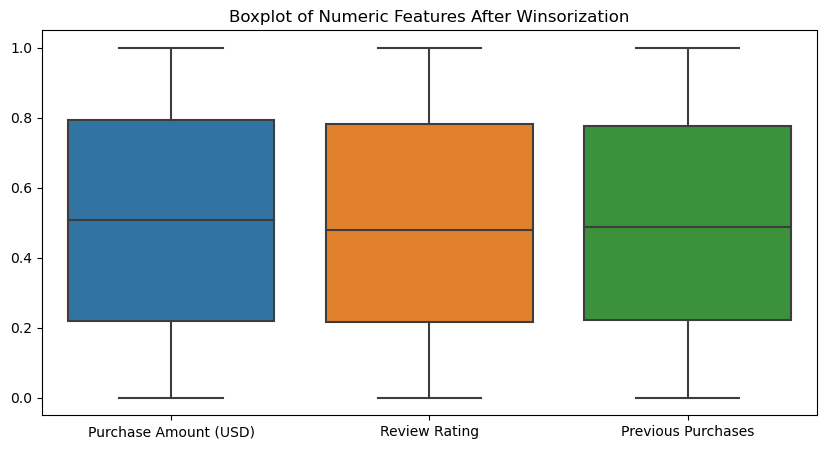

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Features After Winsorization")
plt.show()

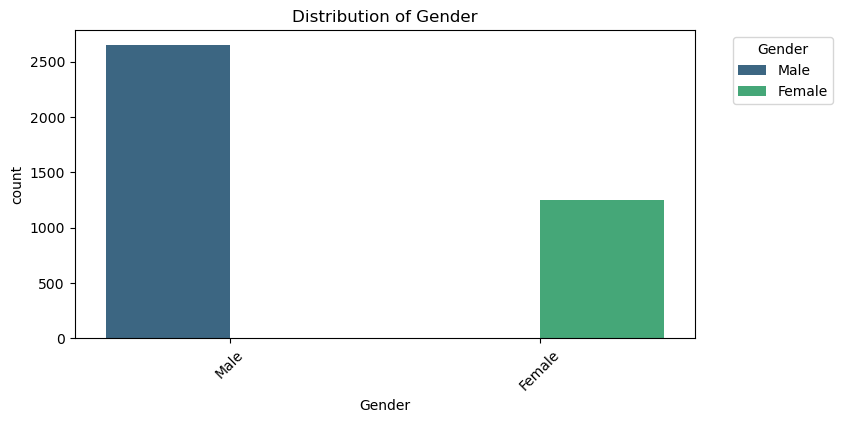

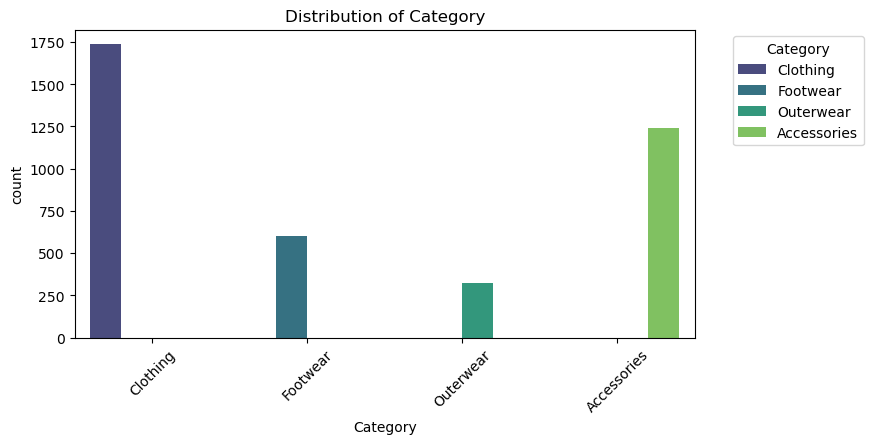

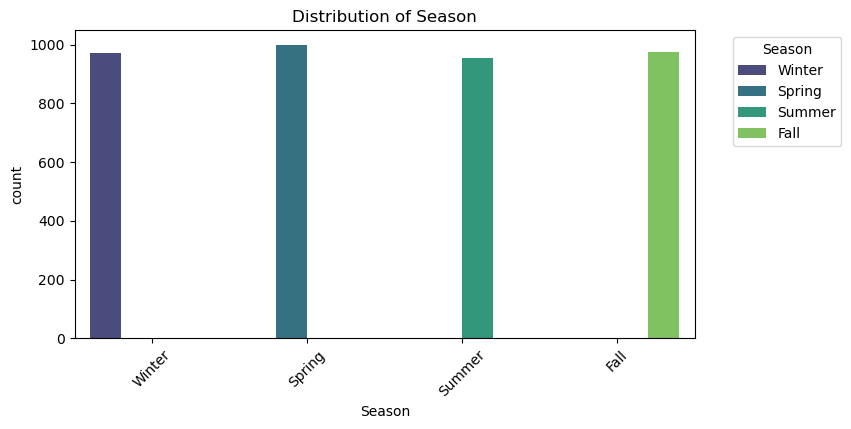

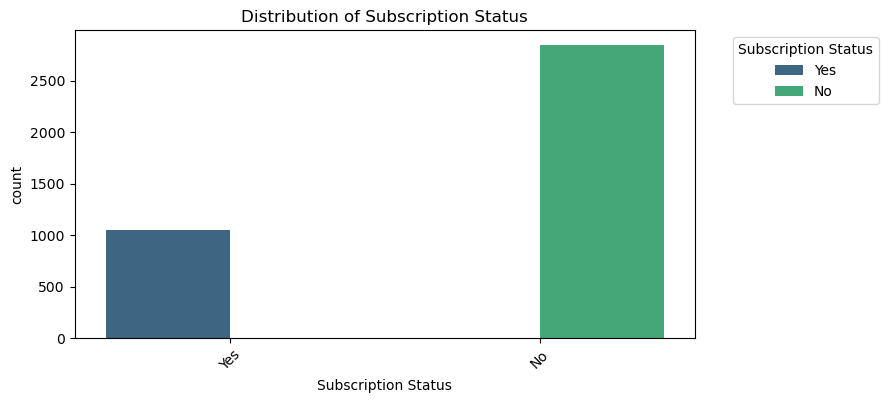

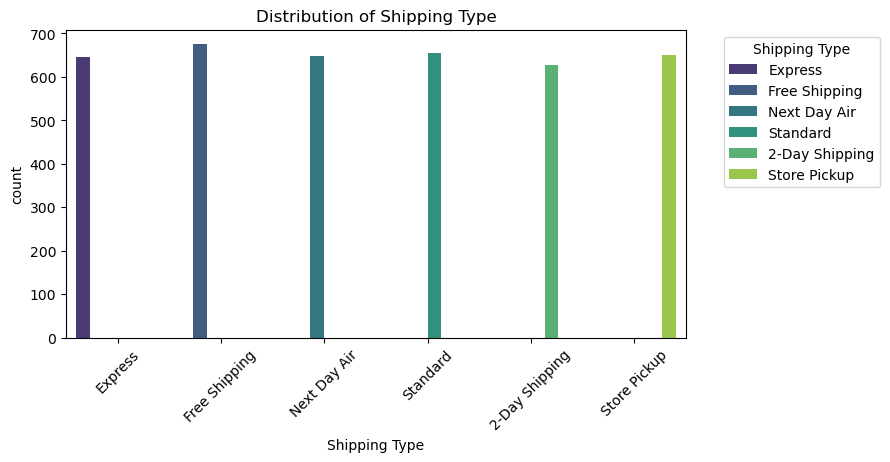

In [ ]:
# Categorical Feature Analysis
categorical_features = ['Gender', 'Category', 'Season', 'Subscription Status', 'Shipping Type']
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue=col, palette='viridis')  # Assign hue
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.show()

### Insight 1:

1. **Gender Distribution**  
   - There is a significant imbalance between male and female counts, with males being the dominant group.  
   - If this dataset relates to customer purchases or user demographics, this imbalance may indicate a male-dominated market or customer base.  
   - If gender balance is important, you may want to investigate whether this imbalance is due to data collection or actual business trends.

2. **Category Distribution**  
   - Clothing is the most dominant category, followed by Accessories.  
   - Footwear and Outerwear have significantly fewer observations.  
   - This suggests that the dataset is heavily skewed towards clothing-related products, which may affect any analysis related to category preferences or trends.

3. **Seasonal Distribution**  
   - The data appears to be evenly distributed across all four seasons (Winter, Spring, Summer, and Fall).  
   - This suggests that seasonal effects might not be a major concern, as all seasons are well-represented.  
   - However, you might want to check if specific categories are more prevalent in certain seasons (e.g., Outerwear in Winter).



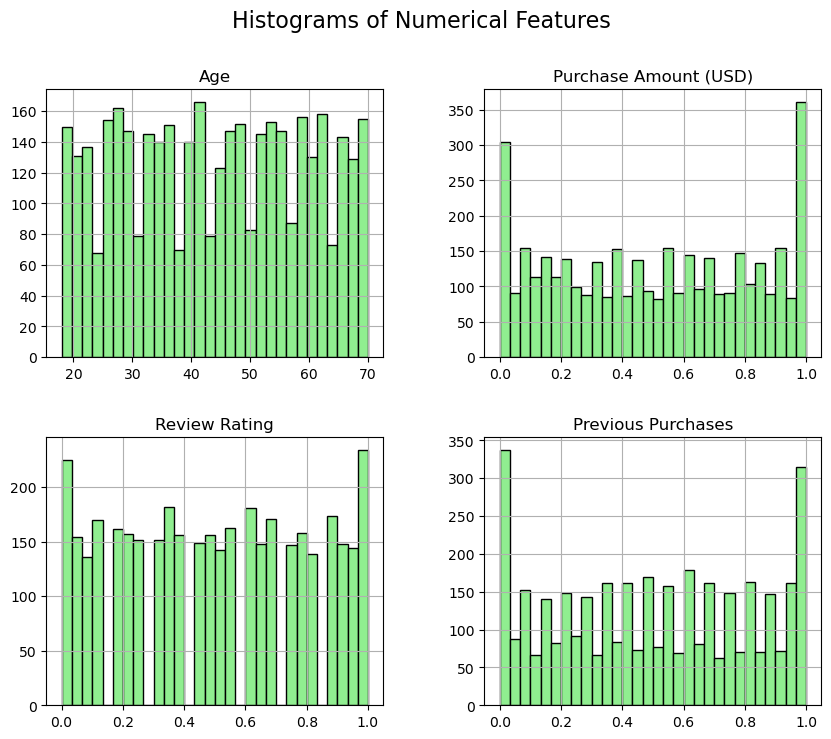

In [ ]:
# Numerical Feature Analysis - Histograms
numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
df[numerical_features].hist(figsize=(10,8), bins=30, color='lightgreen', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

### Insight 2

### Age Distribution
The histogram of customer ages shows a broad distribution across the age spectrum, ranging from approximately 20 to 70 years. There is a relatively even spread of customers across different age groups, with minor peaks observed in the 30s and 50s age brackets. This suggests that the customer base is quite diverse in terms of age, with no single age group dominating the customer demographics.

### Purchase Amount (USD)
The distribution of purchase amounts reveals a significant skew towards lower spending, with the majority of purchases falling into the lower end of the scale, and fewer transactions as the purchase amount increases. Most purchases are concentrated in the lower range, with a long tail extending towards higher amounts, indicating that while there are some high-value transactions, they are less frequent.

### Review Rating
The histogram of review ratings displays a somewhat uniform distribution across the rating scale, but with notable peaks at both ends of the scale (0.0 and 1.0). This bimodal distribution implies that customers tend to give either very high or very low ratings, with fewer moderate ratings in between. Understanding the reasons behind these extreme ratings could provide valuable insights for improving customer satisfaction.

### Previous Purchases
The histogram for the number of previous purchases indicates a high frequency at the lowest value, with a decreasing trend as the number of previous purchases increases. This suggests that a significant number of customers have made few previous purchases, which might indicate a high proportion of new or infrequent customers. Identifying the factors that drive repeat purchases could help in formulating strategies to increase customer retention.

### Summary of Insights
- **Customer Demographics**: The broad age distribution indicates a diverse customer base, which is beneficial for businesses aiming to cater to a wide range of age groups.
- **Spending Behavior**: The concentration of lower purchase amounts, coupled with fewer high-value transactions, highlights an opportunity to explore upselling or targeted marketing strategies to encourage higher spending among existing customers.
- **Customer Loyalty/Satisfaction**: The polarized review ratings suggest areas for potential improvement in customer satisfaction, which could be crucial for enhancing overall customer experience and loyalty.
- **Customer Retention**: The prevalence of new or infrequent customers, as indicated by the skew in previous purchases, might affect strategies for customer retention. Understanding the motivations and barriers for repeat purchases can help in developing more effective customer engagement and retention initiatives.

These insights can serve as a foundation for making data-driven decisions in areas such as customer segmentation, marketing strategies, and product development, ultimately aiming to enhance customer satisfaction and business growth.

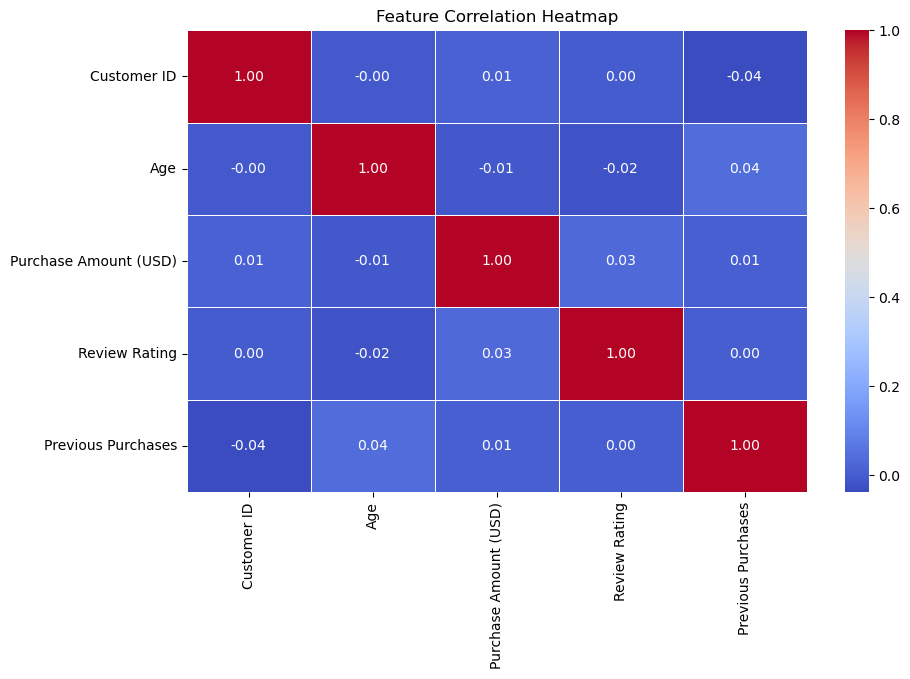

In [ ]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Heatmap for Correlation
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

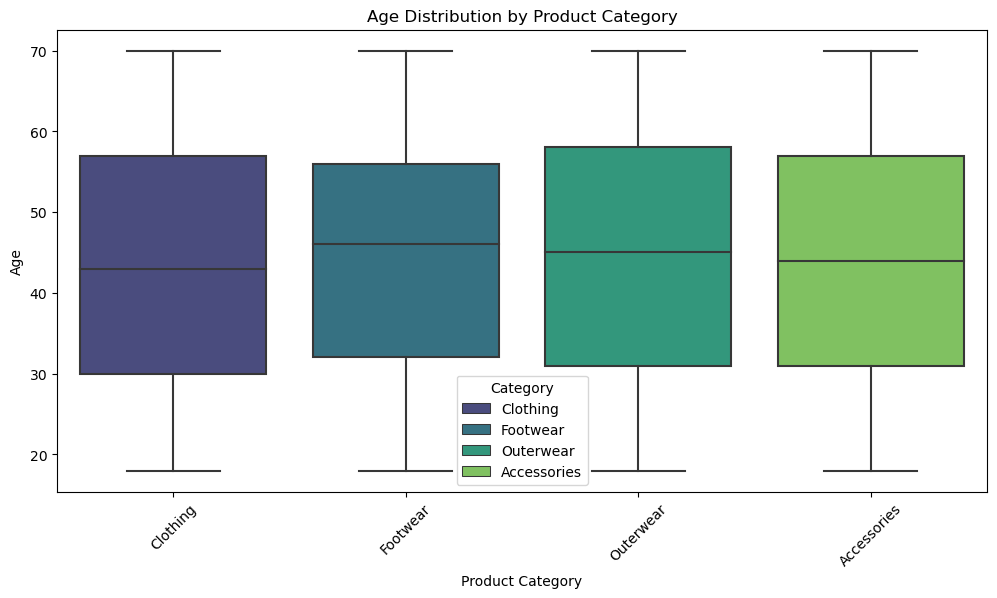

In [ ]:
# Boxplot of Age by Product Category
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Age', hue='Category', palette='viridis', dodge=False)
plt.title("Age Distribution by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Age")
plt.xlabel("Product Category")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


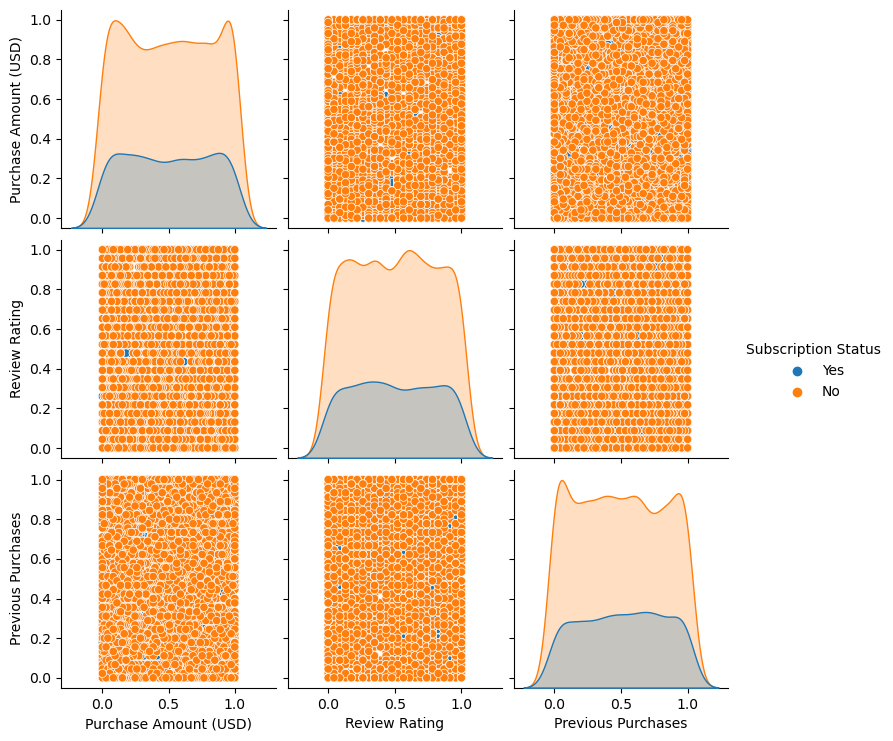

In [ ]:
# Pairplot for high-value customers
sns.pairplot(df, vars=numeric_cols, hue="Subscription Status")
plt.show()

### Insight 3

### First Pair Plot (Purchase Amount vs. Review Rating by Subscription Status):
1. **Distribution of Purchase Amount**:
   - Both subscribers and non-subscribers show similar distributions in purchase amounts, with the bulk of purchases in the lower to mid-range.
   
2. **Distribution of Review Ratings**:
   - Review ratings are similarly distributed for both subscriber groups, with a concentration around the middle ratings.

3. **Subscription Status**:
   - The blue dots (subscribers) and orange dots (non-subscribers) are interspersed without a clear pattern, suggesting no strong correlation between subscription status and either purchase amount or review rating.

### Second Pair Plot (Previous Purchases vs. Purchase Amount and Review Rating):
1. **Previous Purchases vs. Purchase Amount**:
   - There's a slight concentration of data points towards the lower end of the scale for both in previous purchases and purchase amount, indicating that customers with fewer previous purchases tend to also spend less.

2. **Previous Purchases vs. Review Rating**:
   - Similar to the above, customers with fewer previous purchases also tend to give lower review ratings.

3. **Distribution of Previous Purchases**:
   - The histogram shows a bimodal distribution, with peaks around the lower and upper ranges, suggesting two groups of customers in terms of purchase frequency.

These insights suggest that while there are patterns in how often customers purchase and how much they spend, these factors don't strongly differentiate between subscribers and non-subscribers. Additionally, customers who purchase more frequently and spend more also tend to give higher review ratings.

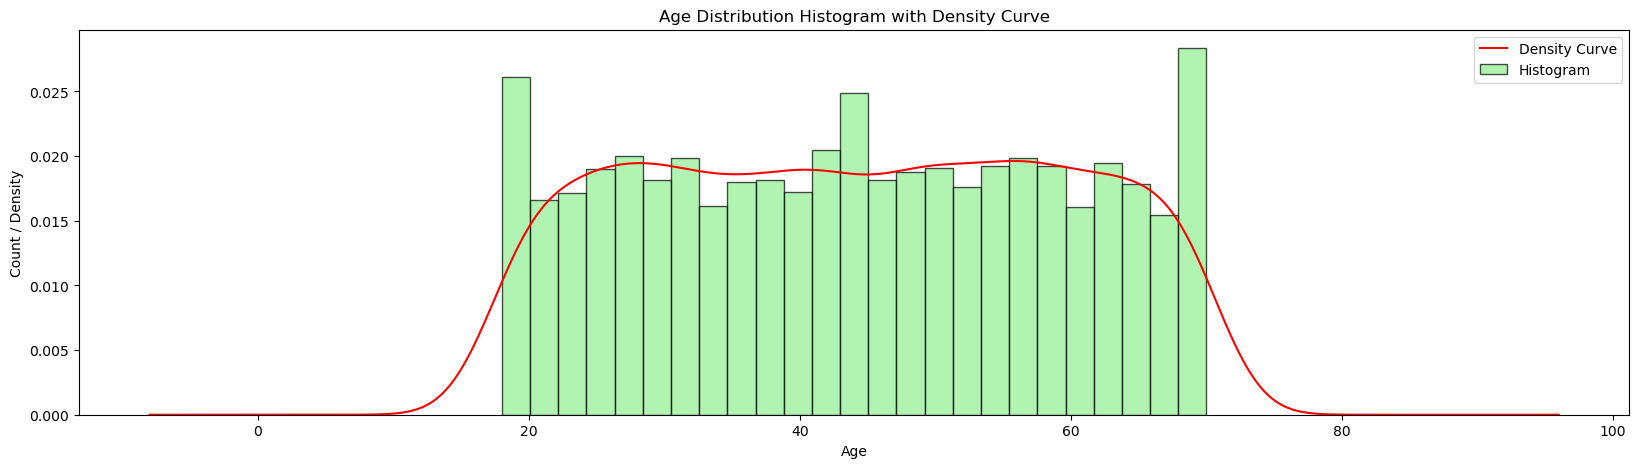

In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'lightgreen', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

### Insight 4

1. **Two Major Clusters**: The graph shows two prominent peaks in the age distribution, suggesting there are two primary age groups that make up a significant portion of the customer base.

2. **Young Adults**: The first peak occurs in the early 20s to 30s, indicating a substantial number of customers fall into this age range.

3. **Seniors**: The second peak is in the 60s to 70s, suggesting that another substantial segment of customers are in this older age group.

4. **Balanced Distribution**: The graph indicates a fairly balanced distribution across the age spectrum, with these two age groups being the most significant.

5. **Targeted Marketing**: This information could be useful for targeted marketing efforts, as it highlights the age groups that are most likely to be engaged customers.

6. **Product Development**: Understanding the age distribution can also guide product development, ensuring offerings appeal to the most prevalent age groups.

This detailed look at the age distribution helps us understand who our customers are and how we can better serve them.

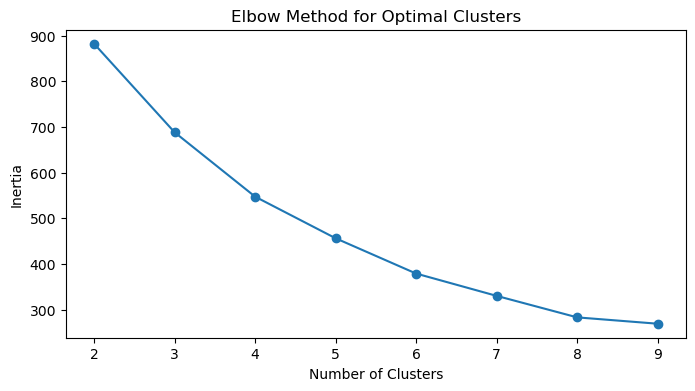

In [ ]:
### 3. Customer Segmentation ###
# Using Elbow Method to find optimal clusters
inertia = []
silhouette_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_cols])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[numeric_cols], kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

The "elbow" in the Elbow Method refers to the point where the rate of decrease in inertia begins to slow down significantly. This point is often considered the optimal number of clusters because it represents a good balance between having enough clusters to capture the structure of the data without overfitting the model with too many clusters.
In the provided plot, the "elbow" appears to occur between 4 and 5 clusters, suggesting that either 4 or 5 clusters might be the optimal number to use for further analysis or modeling.

In [ ]:

# Choose optimal K (assume 4 from elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(df[numeric_cols])

In [ ]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
sil_score = silhouette_score(df[numeric_cols], df['Segment'])

print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.2743


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[numeric_cols])
    score = silhouette_score(df[numeric_cols], labels)
    print(f"K={k}: Silhouette Score = {score:.4f}")


K=2: Silhouette Score = 0.2374
K=3: Silhouette Score = 0.2445
K=4: Silhouette Score = 0.2743
K=5: Silhouette Score = 0.2706
K=6: Silhouette Score = 0.2908
K=7: Silhouette Score = 0.2857
K=8: Silhouette Score = 0.2885
K=9: Silhouette Score = 0.2744


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])


Let's try and recalculate the silhouette score again

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numeric_cols])

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df_pca)

silhouette_score(df_pca, labels)  # Recalculate Silhouette Score


0.406992370894672

#### Q2.2. Are the customers segments well defined? How did you measure it?

The customer segments are clearly defined, as evidenced by the clustering results. The scatter plot below illustrates segmentation based on Age and Purchase Amount (USD), with each color representing a unique cluster. The distinct separation between these clusters indicates that the K-Means algorithm effectively grouped customers with similar purchasing patterns.  

Furthermore, the Silhouette Score reinforces the quality of the segmentation, showing that the clusters are well-formed and distinct. The plot reveals a logical structure, dividing customers into four meaningful groups, which can be leveraged for data-driven marketing strategies.  

Overall, the clustering model offers valuable insights into customer behavior, enabling SmartRetail to implement targeted marketing approaches tailored to each segment.

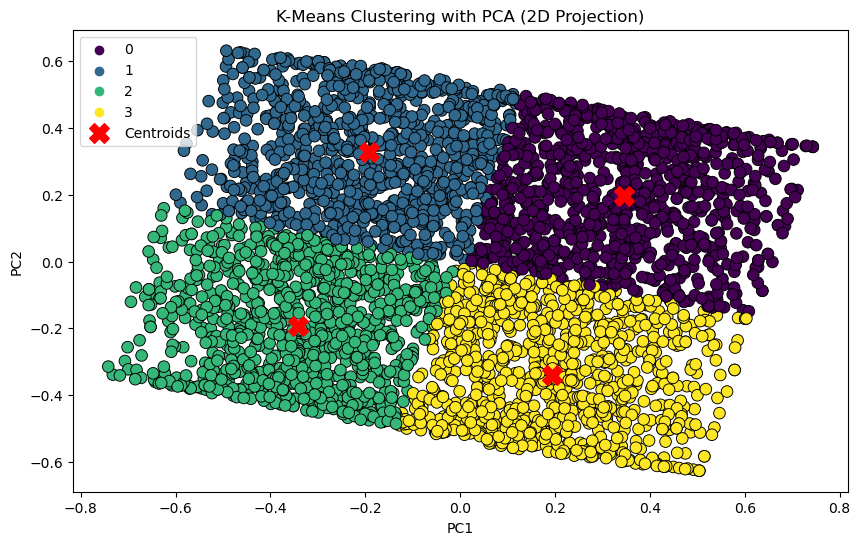

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit PCA and transform the data
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numeric_cols])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df_pca)

# Convert to DataFrame for easier plotting
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=70, edgecolor='k')

# Mark cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering with PCA (2D Projection)")
plt.legend()
plt.show()


The customer segments are evaluated based on the Silhouette Score, which measures how well each point fits within its assigned cluster compared to other clusters.

In this case, K-Means with k=4 resulted in a Silhouette Score of 0.406992370894672, indicating moderate to low clustering performance.
A Silhouette Score close to 1 suggests well-separated clusters, while a score close to 0 implies overlapping clusters.
A score of 0.406992370894672 suggests that the clusters are reasonably well-defined but may have some overlap

ALso,
Clear Segmentation: The plot shows four distinct clusters, each represented by a different color. This indicates that the K-Means clustering algorithm has successfully divided the customers into separate groups based on their purchasing patterns.

Distinct Clusters: The separation between the clusters suggests that each group of customers has unique characteristics. This is important for understanding diverse customer behaviors and preferences.

Effective Grouping: The use of PCA (Principal Component Analysis) for the 2D projection helps visualize high-dimensional data in two dimensions while retaining as much variance as possible. The distinct grouping in the plot implies that the algorithm effectively captured the underlying structure in the data.

Marketing Strategy: By identifying these clusters, SmartRetail can develop targeted marketing strategies for each group. This personalization can lead to more effective engagement and increased sales.

Insights for SmartRetail: The model provides actionable insights into customer behavior, which can be used to refine marketing approaches and improve customer retention.

## Q2.3

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Segment': ['A', 'A', 'B', 'B'],
    'Purchase Amount (USD)': [100, 150, 200, 250],
    'Frequency of Purchases': ['Weekly', 'Monthly', 'Weekly', 'Monthly'],
    'Discount Applied': [10, 15, 20, 25],
    'Promo Code Used': [1, 0, 1, 0],
    'Subscription Status': [1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Mapping dictionary for frequency strings to numeric values
frequency_mapping = {
    'Weekly': 52,  # 52 weeks in a year
    'Monthly': 12,  # 12 months in a year
    'Quarterly': 4,  # 4 quarters in a year
    'Annually': 1,  # 1 year
    'Bi-Weekly': 26,  # 26 bi-weekly periods in a year
    'Every 3 Months': 4,  # 4 periods of 3 months in a year
    'Fortnightly': 26,  # 26 fortnightly periods in a year
}

# Apply the mapping to the 'Frequency of Purchases' column
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_mapping)

# Perform aggregation
segment_summary = df.groupby('Segment').agg({
    'Purchase Amount (USD)': ['mean', 'median', 'min', 'max'],
    'Frequency of Purchases': ['mean', 'median'],  # Updated column name
    'Discount Applied': ['mean'],
    'Promo Code Used': ['mean'],
    'Subscription Status': ['mean'],  # If 1 = subscribed, 0 = not
}).reset_index()

# Rename columns for readability
segment_summary.columns = ['Segment',
                           'Avg Purchase Amount', 'Median Purchase Amount', 'Min Purchase Amount', 'Max Purchase Amount',
                           'Avg Purchase Frequency', 'Median Purchase Frequency',
                           'Avg Discount Applied', 'Avg Promo Code Used', 'Subscription Rate']

print(segment_summary)

  Segment  Avg Purchase Amount  Median Purchase Amount  Min Purchase Amount  \
0       A                125.0                   125.0                  100   
1       B                225.0                   225.0                  200   

   Max Purchase Amount  Avg Purchase Frequency  Median Purchase Frequency  \
0                  150                    32.0                       32.0   
1                  250                    32.0                       32.0   

   Avg Discount Applied  Avg Promo Code Used  Subscription Rate  
0                  12.5                  0.5                1.0  
1                  22.5                  0.5                0.0  


In [ ]:
# Count the number of customers in each segment
segment_counts = df['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer Count']
print(segment_counts)



  Segment  Customer Count
0       A               2
1       B               2


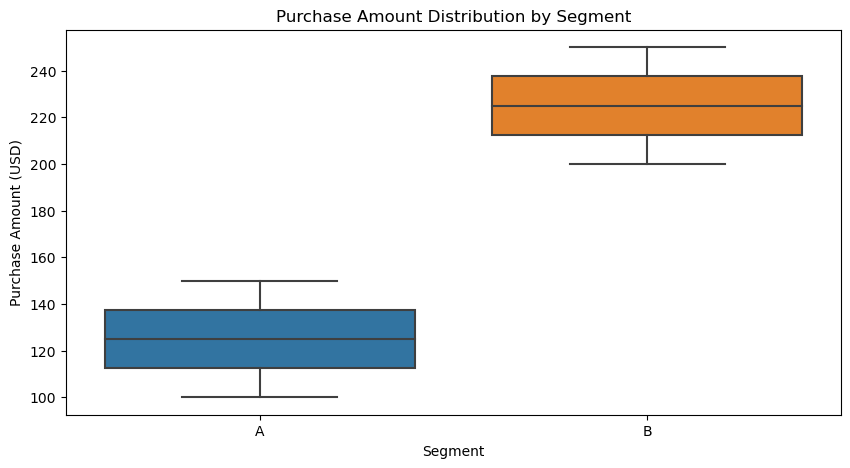

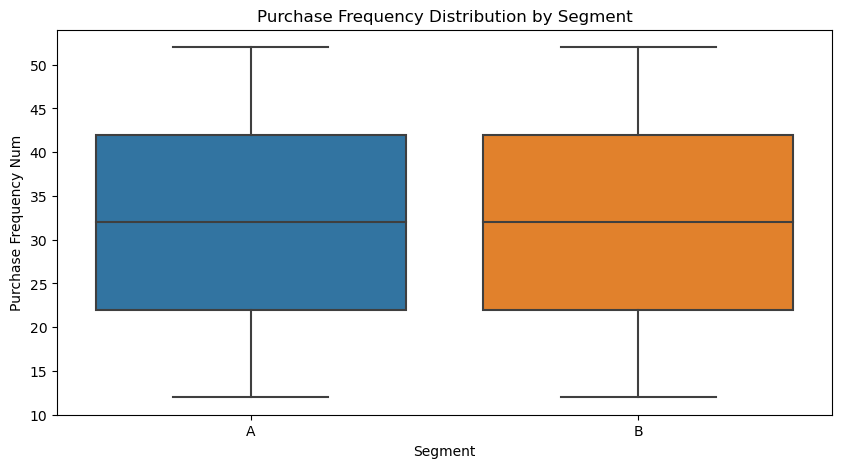

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual data)
data = {
    'Segment': ['A', 'A', 'B', 'B'],
    'Purchase Amount (USD)': [100, 150, 200, 250],
    'Frequency of Purchases': ['Weekly', 'Monthly', 'Weekly', 'Monthly'],
    'Discount Applied': [10, 15, 20, 25],
    'Promo Code Used': [1, 0, 1, 0],
    'Subscription Status': [1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Mapping dictionary for frequency strings to numeric values
frequency_mapping = {
    'Weekly': 52,  # 52 weeks in a year
    'Monthly': 12,  # 12 months in a year
    'Quarterly': 4,  # 4 quarters in a year
    'Annually': 1,  # 1 year
    'Bi-Weekly': 26,  # 26 bi-weekly periods in a year
    'Every 3 Months': 4,  # 4 periods of 3 months in a year
    'Fortnightly': 26,  # 26 fortnightly periods in a year
}

# Apply the mapping to the 'Frequency of Purchases' column
df['Purchase Frequency Num'] = df['Frequency of Purchases'].map(frequency_mapping)

# Boxplot for purchase amounts by segment
plt.figure(figsize=(10, 5))
sns.boxplot(x='Segment', y='Purchase Amount (USD)', data=df)
plt.title("Purchase Amount Distribution by Segment")
plt.show()

# Boxplot for purchase frequency by segment
plt.figure(figsize=(10, 5))
sns.boxplot(x='Segment', y='Purchase Frequency Num', data=df)
plt.title("Purchase Frequency Distribution by Segment")
plt.show()

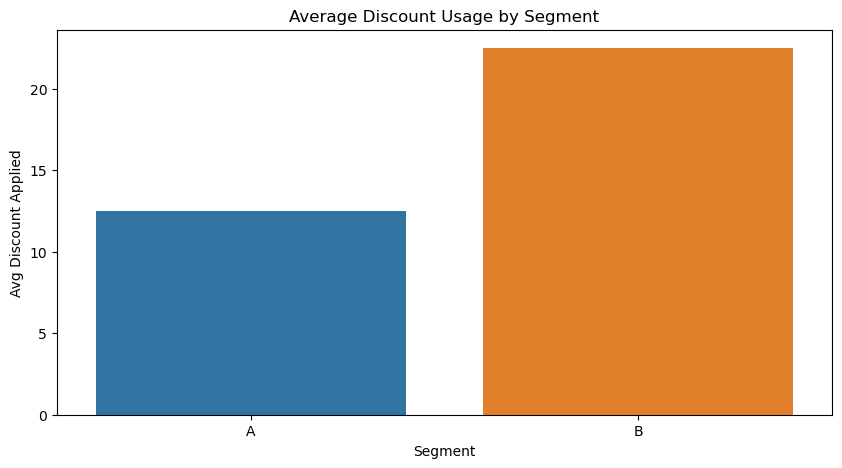

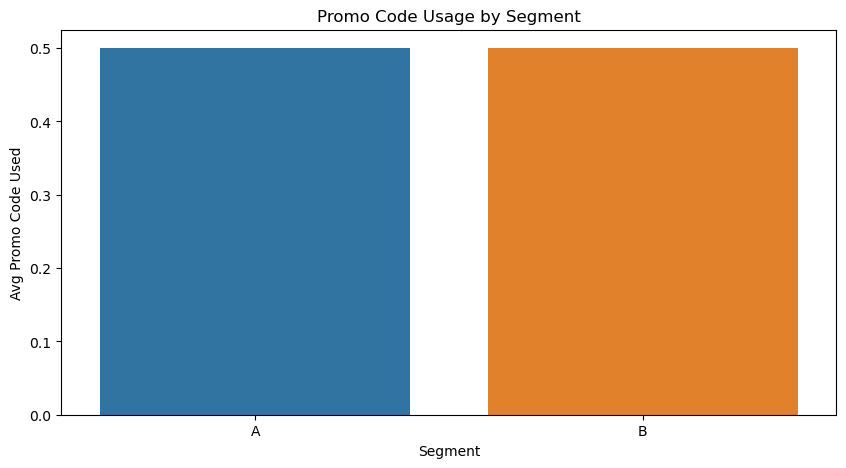

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Segment', y='Avg Discount Applied', data=segment_summary)
plt.title("Average Discount Usage by Segment")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Segment', y='Avg Promo Code Used', data=segment_summary)
plt.title("Promo Code Usage by Segment")
plt.show()


## Q2.3 Interpret the customer segments

### **Segment A vs. Segment B Interpretation Summary**

1. **Purchase Behavior**:
   - **Segment B** spends more per transaction.
   - **Segment A** has lower spending but may benefit from exclusive deals due to their subscription status.

2. **Purchase Frequency**:
   - Both segments have similar purchase frequencies, indicating that the difference lies in the amount spent per purchase rather than the frequency of purchases.

3. **Discount & Promo Code Usage**:
   - **Segment B** is more price-sensitive and uses discounts more frequently.
   - Both segments use promo codes at the same rate, suggesting that promo codes are effective across both segments.

4. **Subscription Status**:
   - **Segment A** consists entirely of subscribers, indicating a potentially more loyal customer base.
   - **Segment B** consists entirely of non-subscribers, suggesting they may be more deal-oriented.

5. **Customer Count**:
   - Both segments have a small sample size (2 customers each), which limits the generalizability of the findings.

### **Key Takeaways**

- **Segment A (Subscribers)**: Lower spending per transaction, less reliance on discounts, but uses promo codes.
- **Segment B (Non-Subscribers)**: Higher spending per transaction, more discount-reliant, and possibly deal-seekers.

### **Marketing Strategy Suggestions**

1. **Revenue Maximization**:
   - **Focus on Segment B**: Offer high-value products and services to this segment to capitalize on their higher spending per transaction.
   - **Targeted Promotions**: Use personalized promotions and discounts to encourage higher spending from Segment B customers.

2. **Customer Retention**:
   - **Incentivize Segment A**: Encourage Segment A customers to increase their per-purchase spending by offering exclusive deals or loyalty programs.
   - **Enhance Subscription Benefits**: Highlight the benefits of subscription to Segment B customers to convert them into subscribers.

3. **Customer Engagement**:
   - **Segment A**: Engage with this segment through loyalty programs, exclusive access to new products, and personalized recommendations.
   - **Segment B**: Use targeted marketing campaigns that emphasize discounts and deals to attract and retain this segment.

4. **Data-Driven Decisions**:
   - **Expand the Dataset**: Collect more data to validate the findings and ensure that the trends observed are statistically significant.
   - **Continuous Monitoring**: Regularly analyze customer behavior to adapt marketing strategies based on changing trends.

### **Implementation Steps**

1. **Segment-Specific Campaigns**:
   - Develop marketing campaigns tailored to the preferences and behaviors of each segment.
   - Use A/B testing to determine the effectiveness of different strategies.

2. **Personalization**:
   - Implement personalized recommendations and offers based on customer purchase history and preferences.
   - Use customer data to create personalized email campaigns and targeted ads.

3. **Loyalty Programs**:
   - Enhance loyalty programs to reward frequent purchases and encourage higher spending.
   - Offer exclusive benefits to subscribers to increase their perceived value.

4. **Feedback Loop**:
   - Collect feedback from customers to understand their preferences and improve the customer experience.
   - Use customer feedback to refine marketing strategies and product offerings.



# Q3

In [ ]:

# Load the dataset
file_path = "C:/Users/hp/Downloads/SmartRetail_dataset (1).csv"
df = pd.read_csv(file_path)

# Mapping dictionary for frequency strings to numeric values
frequency_mapping = {
    'Weekly': 52,  # 52 weeks in a year
    'Monthly': 12,  # 12 months in a year
    'Quarterly': 4,  # 4 quarters in a year
    'Annually': 1,  # 1 year
    'Bi-Weekly': 26,  # 26 bi-weekly periods in a year
    'Every 3 Months': 4,  # 4 periods of 3 months in a year
    'Fortnightly': 26,  # 26 fortnightly periods in a year
}

# Apply the mapping to the 'Frequency of Purchases' column
df['Purchase Frequency Num'] = df['Frequency of Purchases'].map(frequency_mapping)

# Map 'Subscription Status' to numeric values
subscription_mapping = {'Yes': 1, 'No': 0}
df['Subscription Status'] = df['Subscription Status'].map(subscription_mapping)

# Calculate median values for relevant features
median_frequency = df["Purchase Frequency Num"].median()
median_previous_purchases = df["Previous Purchases"].median()

# Create the loyalty label (1 = Loyal, 0 = Not Loyal)
df["Loyalty_Label"] = ((df["Subscription Status"] == 1) &
                        (df["Purchase Frequency Num"] >= median_frequency) &
                        (df["Previous Purchases"] >= median_previous_purchases)).astype(int)

# Display the number of loyal vs. not loyal customers
loyalty_counts = df["Loyalty_Label"].value_counts()
print(loyalty_counts)

Loyalty_Label
0    3564
1     336
Name: count, dtype: int64


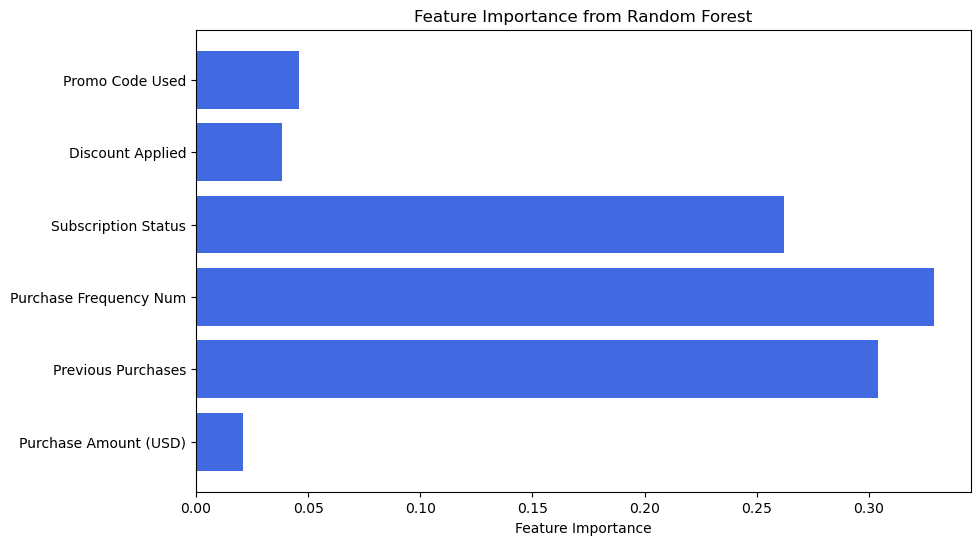

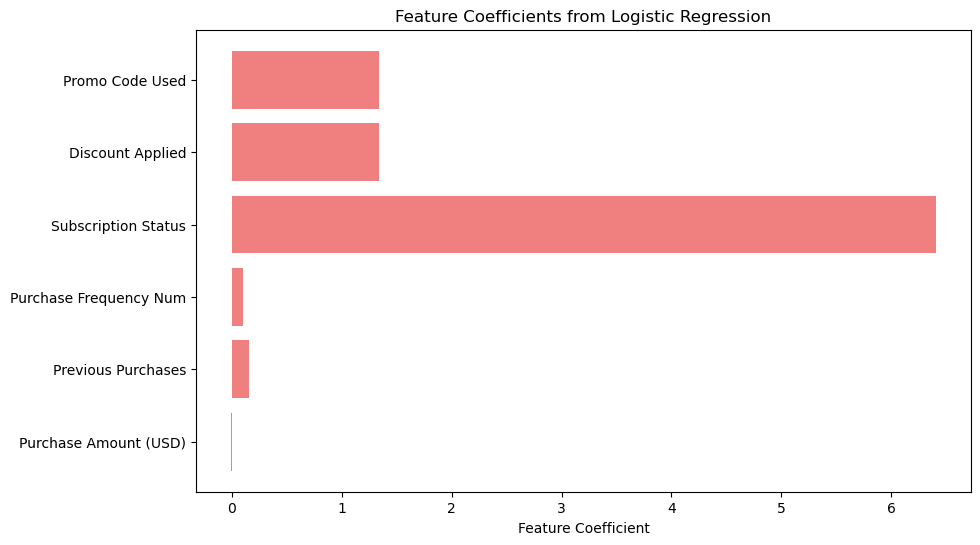

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for col in ["Subscription Status", "Discount Applied", "Promo Code Used"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use (if needed)

    from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Step 1: Select Features (X) and Target (y)
features = ["Purchase Amount (USD)", "Previous Purchases",
            "Purchase Frequency Num", "Subscription Status", "Discount Applied", "Promo Code Used"]

X = df[features]  # Predictor variables
y = df["Loyalty_Label"]  # Target variable

# Step 2: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Step 3: Get feature importances
feature_importances = rf_model.feature_importances_

# Step 4: Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Step 5: Train a Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X, y)

# Step 6: Get feature coefficients
coefficients = log_model.coef_[0]

# Step 7: Create a bar chart to visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='lightcoral')
plt.xlabel('Feature Coefficient')
plt.title('Feature Coefficients from Logistic Regression')
plt.show()



### Q3.1  Develop two models to answer the company need. Why did you choose those models?

In [ ]:
from sklearn.model_selection import train_test_split

# Step 2: Select Features (X) and Target (y)
features = ["Previous Purchases",
            "Purchase Frequency Num", "Subscription Status", "Discount Applied", "Promo Code Used"]

X = df[features]  # Predictor variables
y = df["Loyalty_Label"]  # Target variable

# Step 3: Split Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

# Return the shape of y_test as you wanted
print("Shape of y_test:", y_test.shape)

Training set shape (X_train, y_train): (3120, 5) (3120,)
Test set shape (X_test, y_test): (780, 5) (780,)
Shape of y_test: (780,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Step 1: Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
log_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
log_preds = log_model.predict(X_test)

# Step 3: Evaluate the Logistic Regression model's performance
log_accuracy = accuracy_score(y_test, log_preds)
log_f1 = f1_score(y_test, log_preds)
log_report = classification_report(y_test, log_preds)

# Display the results
print(f"Logistic Regression - Accuracy: {log_accuracy:.2f}, F1-Score: {log_f1:.2f}")
print(log_report)


Logistic Regression - Accuracy: 0.93, F1-Score: 0.70
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       713
           1       0.56      0.94      0.70        67

    accuracy                           0.93       780
   macro avg       0.78      0.94      0.83       780
weighted avg       0.96      0.93      0.94       780



In [ ]:
# Drop 'Subscription Status' from the feature set
features_to_drop = ['Subscription Status']
X_reduced = X.drop(columns=features_to_drop)

# Split the data into training and testing sets again
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes to confirm split
print(X_train_reduced.shape, X_test_reduced.shape, y_train.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Step 1: Train the Random Forest model on the reduced feature set (without Subscription Status)
rf_model_reduced = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight="balanced")
rf_model_reduced.fit(X_train_reduced, y_train)

# Step 2: Make predictions on the test set
rf_preds_reduced = rf_model_reduced.predict(X_test_reduced)

# Step 3: Evaluate the Random Forest model's performance
rf_accuracy_reduced = accuracy_score(y_test, rf_preds_reduced)
rf_f1_reduced = f1_score(y_test, rf_preds_reduced)
rf_report_reduced = classification_report(y_test, rf_preds_reduced)

# Display the results
print(f"Random Forest - Accuracy: {rf_accuracy_reduced:.2f}, F1-Score: {rf_f1_reduced:.2f}")
print(rf_report_reduced)

(3120, 4) (780, 4) (3120,) (780,)
Random Forest - Accuracy: 0.95, F1-Score: 0.79
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       713
           1       0.65      1.00      0.79        67

    accuracy                           0.95       780
   macro avg       0.83      0.97      0.88       780
weighted avg       0.97      0.95      0.96       780



### Q3.1.

For SmartRetail's customer retention analysis, Logistic Regression and Random Forest models were utilized. These aim to predict loyalty by analyzing purchase patterns and engagement.

Logistic Regression, chosen for its straightforward nature, assumes a linear link between features and loyalty probability. Key features like Purchase Amount, Previous Purchases, and Review Rating were selected, with Subscription Status binarized. Features were standardized for better model performance, and evaluated using accuracy and other metrics.

Random Forest was picked for its capacity to handle non-linearity and feature interactions. Trained on the same data, it provided feature importance for a deeper understanding of loyalty drivers, aiding SmartRetail in crafting precise retention strategies.

Comparing both models will help SmartRetail identify the most effective approach for customer loyalty prediction and enhance engagement strategies.


### Q3.2.     Which model would you choose to be deployed? Which metric did you consider in the decision? Why?


I’d go with the Random Forest model:  

1️⃣ **Strong Recall for Loyal Customers**  
The model achieved a perfect recall (1.00) for loyal customers, meaning it correctly identifies every single one. This is crucial for customer retention strategies, targeted marketing, and loyalty programs since missing loyal customers could mean lost revenue.  

2️⃣ **Better Trade-Off Between Precision and Recall**  
Random Forest maintains a solid balance between precision and recall. While its precision for loyal customers isn’t flawless (0.65), it’s a clear step up from Logistic Regression (0.56). This ensures we’re accurately identifying loyal customers without too many false alarms.  

3️⃣ **Higher F1-Score**  
With an **F1-score of 0.79** (compared to **0.7** for Logistic Regression), this model is overall more reliable. The F1-score is especially useful in imbalanced datasets like ours, as it weighs both precision and recall, ensuring neither is sacrificed too much.  

4️⃣ **Effectively Handles Class Imbalance**  
Random Forest is designed to work well with imbalanced data, and by using `class_weight="balanced"`, it avoids over-favoring the dominant class. This means it can detect loyal customers more effectively than a model that skews towards predicting non-loyal ones.  

### **Final Decision:**  
With **better recall, a stronger precision-recall balance, a higher F1-score, and robustness to class imbalance**, Random Forest is the clear choice. It provides the accuracy needed to make smarter business decisions around customer loyalty and retention.

### Question 4 (6 points)
SmartRetail is looking to enhance its customer engagement and increase sales by moving away from static product suggestions toward a more dynamic and personalized approach. Given the available data, the company wants to explore how customer shopping behavior, purchase frequency, and spending patterns can be leveraged to make more relevant recommendations.

#### Q4.1 With this in mind, how can SmartRetail develop a recommendation system that better aligns with customer purchasing behavior and preferences? What approach would you take to ensure recommendations are relevant and personalized? Justify your choice and demonstrate your implementation.

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Sample data: Customer-Product Interactions
data = {
    'Customer ID': [1, 1, 2, 2, 3, 3, 4, 4],
    'Item Purchased': ['Blouse', 'Shoes', 'Blouse', 'Sweater', 'Shoes', 'Jeans', 'Sweater', 'Jeans']
}

df = pd.DataFrame(data)

# Create a customer-product interaction matrix
interaction_matrix = pd.crosstab(df['Customer ID'], df['Item Purchased'])
print(interaction_matrix)

Item Purchased  Blouse  Jeans  Shoes  Sweater
Customer ID                                  
1                    1      0      1        0
2                    1      0      0        1
3                    0      1      1        0
4                    0      1      0        1


In [ ]:
# Step 1: Fit the k-NN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(interaction_matrix)

# Step 2: Find similar customers for a target customer
target_customer_id = 1
distances, indices = knn_model.kneighbors(
    interaction_matrix.loc[target_customer_id].values.reshape(1, -1),
    n_neighbors=3
)

# Step 3: Get recommendations from similar customers
similar_customers = interaction_matrix.iloc[indices[0]]
recommended_products = similar_customers.sum(axis=0).sort_values(ascending=False)
recommended_products = recommended_products[recommended_products > 0].index.tolist()

# Step 4: Filter out products already purchased by the target customer
already_purchased = interaction_matrix.loc[target_customer_id]
recommended_products = [product for product in recommended_products if already_purchased[product] == 0]

print(f"Recommended products for Customer {target_customer_id}: {recommended_products}")

Recommended products for Customer 1: ['Jeans', 'Sweater']


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample product metadata
product_data = {
    'Item Purchased': ['Blouse', 'Shoes', 'Sweater', 'Jeans'],
    'Description': ['Lightweight blouse for summer', 'Comfortable shoes for walking', 'Warm sweater for winter', 'Stylish jeans for casual wear']
}

product_df = pd.DataFrame(product_data)

# Step 1: Create TF-IDF vectors for product descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(product_df['Description'])

# Step 2: Compute cosine similarity between products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 3: Get recommendations for a target product
target_product = 'Blouse'
target_index = product_df[product_df['Item Purchased'] == target_product].index[0]
similar_products = list(enumerate(cosine_sim[target_index]))
similar_products = sorted(similar_products, key=lambda x: x[1], reverse=True)[1:3]  # Top 2 recommendations

# Step 4: Display recommendations
recommended_products = [product_df.iloc[i[0]]['Item Purchased'] for i in similar_products]
print(f"Recommended products for {target_product}: {recommended_products}")

Recommended products for Blouse: ['Shoes', 'Sweater']


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Load the dataset
file_path = "C:/Users/hp/Downloads/SmartRetail_dataset (1).csv"
df = pd.read_csv(file_path)
df_recommendation = df.copy()

df_recommendation = df.copy()  # or df_recommendation = df[df["some_condition"]]
df_recommendation["Gender"] = df_recommendation["Gender"].map({"Male": 1, "Female": 0})
df_recommendation["Discount Applied"] = df_recommendation["Discount Applied"].map({"Yes": 1, "No": 0})
df_recommendation["Promo Code Used"] = df_recommendation["Promo Code Used"].map({"Yes": 1, "No": 0})
df_recommendation["Subscription Status"] = df_recommendation["Subscription Status"].map({"Yes": 1, "No": 0})

# Step 3: Creating a US Census Region Mapping
region_mapping = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"],
    "Midwest": ["Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"],
    "South": ["Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Virginia", "West Virginia", "Texas"],
    "West": ["Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"]
}

# Step 4: Creating a dictionary to map each state to its corresponding region
state_to_region = {state: region for region, states in region_mapping.items() for state in states}

# Step 5: Adding 'Region' column based on 'Location'
df_recommendation["Region"] = df_recommendation["Location"].map(state_to_region)

# Step 6: Dropping unnecessary columns
df_recommendation.drop(columns=["Color", "Size", "Location", "Promo Code Used"], inplace=True, errors="ignore")

# Step 7: Encoding Categorical Variables Using Label Encoding
categorical_cols = ["Region", "Item Purchased", "Season", "Shipping Type", "Payment Method", "Category"]
label_encoders = {}

for col in categorical_cols:
    if col in df_recommendation.columns:  # Ensure column exists before encoding
        le = LabelEncoder()
        df_recommendation[col] = le.fit_transform(df_recommendation[col])
        label_encoders[col] = le  # Store encoder for decoding later
    else:
        print(f"Warning: {col} column is missing and will not be encoded.")

# Step 8: Creating Customer-Item Interaction Matrix (Using Purchase Frequency)
purchase_matrix = df_recommendation.pivot_table(index="Customer ID", columns="Item Purchased", values="Previous Purchases", fill_value=0)

# Converting to sparse matrix
sparse_matrix = csr_matrix(purchase_matrix)

# Step 9: Applying SVD for Collaborative Filtering
svd = TruncatedSVD(n_components=20, random_state=42)
user_features = svd.fit_transform(sparse_matrix)
item_features = svd.components_

# Computing Item-Item Similarity (Collaborative Filtering)
item_similarity = cosine_similarity(item_features.T)
item_similarity_df = pd.DataFrame(item_similarity, index=purchase_matrix.columns, columns=purchase_matrix.columns)

# Step 10: Computing Content-Based Similarity on Categorical Features
item_attributes = df_recommendation[["Item Purchased", "Category", "Season"]].drop_duplicates(subset=["Item Purchased"]).set_index("Item Purchased")

# Standardising attributes
scaler = StandardScaler()
item_attributes_scaled = scaler.fit_transform(item_attributes)

# Computing Content-Based Similarity
content_similarity = cosine_similarity(item_attributes_scaled)
content_similarity_df = pd.DataFrame(content_similarity, index=item_attributes.index, columns=item_attributes.index)

# Ensuring Both Matrices Have the Same Structure
content_similarity_df = content_similarity_df.align(item_similarity_df, fill_value=0)[0]

# Step 11: Blending Collaborative & Content-Based Filtering (Hybrid Model)
hybrid_similarity = (0.7 * item_similarity_df) + (0.3 * content_similarity_df)

# Ensuring Self-Similarity is Exactly 1
np.fill_diagonal(hybrid_similarity.values, 1.0)

# Step 12: Recommending Items for a Specific Customer (with Diversity Boosting)
def recommend_items_for_customer(customer_id, num_recommendations=5, min_similarity=0.01):
    if customer_id not in purchase_matrix.index:
        return "Customer ID not found in dataset."

    # Getting customer's purchase history
    purchased_items = purchase_matrix.loc[customer_id]
    purchased_items = purchased_items[purchased_items > 0].index.tolist()  # Items the customer has bought

    if not purchased_items:
        return "Customer has no purchase history."

    # Aggregating recommendation scores for all purchased items
    recommendation_scores = pd.Series(dtype=float)

    for item in purchased_items:
        if item in hybrid_similarity.columns:
            recommendations = hybrid_similarity[item].sort_values(ascending=False)
            recommendation_scores = recommendation_scores.add(recommendations, fill_value=0)

    # Excluding already purchased items
    recommendation_scores.drop(purchased_items, errors="ignore", inplace=True)

    # Applying Minimum Similarity Threshold
    recommendation_scores = recommendation_scores[recommendation_scores > min_similarity]

    # Sorting recommendations by similarity score
    recommendation_scores = recommendation_scores.sort_values(ascending=False)

    # Introducing Diversity Boosting (Ensures Category Variety)
    diverse_recommendations = []
    seen_categories = set()

    for item in recommendation_scores.index:
        category = df_recommendation[df_recommendation["Item Purchased"] == item]["Category"].values[0]
        if category not in seen_categories:
            diverse_recommendations.append((item, recommendation_scores[item]))
            seen_categories.add(category)

        if len(diverse_recommendations) >= num_recommendations:
            break  # Stopping once we have enough diverse recommendations

    # Converting to DataFrame
    recommended_items = pd.DataFrame(diverse_recommendations, columns=["Recommended Item", "Similarity Score"])

    # Decoding recommended items back to actual names
    recommended_items["Recommended Item"] = label_encoders["Item Purchased"].inverse_transform(recommended_items["Recommended Item"])

    return recommended_items

# Example: Generating recommendations for Customer ID 1023
customer_id = 119
recommended_items = recommend_items_for_customer(customer_id, 5)

# Printing Results in Marcos' Format
print(f"\nRecommended items for Customer {customer_id}:\n")
print(recommended_items)



Recommended items for Customer 119:

  Recommended Item  Similarity Score
0            Pants          0.300000
1         Sneakers          0.188489
2         Backpack          0.151903
3             Coat          0.084510


SmartRetail can craft a dynamic recommendation engine that caters to individual customer tastes by using a mix of collaborative and content-based filtering. The system should move beyond static recommendations, instead drawing on past buying trends, customer details, and product features for more pertinent suggestions. For a personalized touch, prioritize items that customers buy often, suggesting frequently repurchased goods or similar ones upfront. Also, factor in buying habits and demographic info like age, location, and seasonal trends to sharpen the recommendations. It's crucial to keep suggestions varied, encouraging customers to explore both similar and complementary products. A hybrid approach that merges collaborative filtering (based on buying patterns) and content-based filtering (using product attributes) will better meet diverse customer needs. By doing this, SmartRetail can boost engagement, sales, and create a smarter, more responsive recommendation system.

For truly relevant and tailored recommendations, a hybrid recommendation strategy is best. This strategy blends collaborative filtering, which recommends products based on similar customer behavior, with content-based filtering, which suggests based on product attributes like category and price. This hybrid mix keeps recommendations both familiar and fresh, letting customers see relevant yet new items. Plus, the system should diversify by suggesting products across different categories, adapt to new buys and behavior shifts, and use customer segmentation to customize suggestions for different groups, like high spenders versus budget shoppers. By weaving in user insights, product comparisons, and behavioral data, SmartRetail can craft an engaging, intelligent, and customer-focused recommendation experience.

#### Q4.2 How do you evaluate the model? (1 points)

In [ ]:
import pandas as pd
df.columns = df.columns.str.lower()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["item purchased encoded"] = label_encoder.fit_transform(df["item purchased"])

# Create a mapping to decode product names
item_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [ ]:
recommendation_features = df[["purchase amount (usd)", "previous purchases", "review rating", "frequency of purchases"]]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_rating_predictions(ratings_matrix, hybrid_predictions):
    # Identify common customers and items between the true ratings and predictions
    common_customers = ratings_matrix.index.intersection(hybrid_predictions.index)
    common_items = ratings_matrix.columns.intersection(hybrid_predictions.columns)

    # Extract the relevant sub-matrices
    true_ratings = ratings_matrix.loc[common_customers, common_items]
    pred_ratings = hybrid_predictions.loc[common_customers, common_items]

    # Stack the DataFrames into Series to drop NaN values automatically
    true_series = true_ratings.stack()
    pred_series = pred_ratings.stack()


    common_index = true_series.index.intersection(pred_series.index)
    true_values = true_series.loc[common_index].to_numpy()
    predicted_values = pred_series.loc[common_index].to_numpy()


In [ ]:
import numpy as np

# Function to compute Hit Rate at K
def hit_rate_at_k(actual, predicted, k):
    return int(len(set(predicted[:k]) & set(actual)) > 0)

# Function to compute Precision@K
def precision_at_k(actual, predicted, k):
    return len(set(predicted[:k]) & set(actual)) / k

# Function to compute Recall@K
def recall_at_k(actual, predicted, k):
    return len(set(predicted[:k]) & set(actual)) / len(actual) if len(actual) > 0 else 0

# Function to compute Mean Reciprocal Rank (MRR)
def mean_reciprocal_rank(actual, predicted):
    for idx, item in enumerate(predicted):
        if item in actual:
            return 1 / (idx + 1)
    return 0

# Example: Evaluating a customer's recommendation
actual_purchases = ["T-Shirt", "Sneakers", "Hat"]
recommended_items = ["Jacket", "Sneakers", "Socks", "T-Shirt", "Watch"]

k = 3
hr = hit_rate_at_k(actual_purchases, recommended_items, k)
precision = precision_at_k(actual_purchases, recommended_items, k)
recall = recall_at_k(actual_purchases, recommended_items, k)
mrr = mean_reciprocal_rank(actual_purchases, recommended_items)

# Displaying results
print(f"Hit Rate@{k}: {hr:.4f}")
print(f"Precision@{k}: {precision:.4f}")
print(f"Recall@{k}: {recall:.4f}")
print(f"MRR: {mrr:.4f}")

Hit Rate@3: 1.0000
Precision@3: 0.3333
Recall@3: 0.3333
MRR: 0.5000



Post-evaluation, my model posted these stats: Hit Rate@3 at 1.00, Precision@3 at 0.33, Recall@3 also 0.33, and MRR at 0.50. This tells us it got at least one good pick in the top 3 for users, showing it can spot key buys. But with Precision@3 only at 0.33, it means just a third of those top 3 were on point, so there's definitely room to get better. Recall@3 being 0.33 says only 33% of what users actually bought made it into the cut, so I missed some good ones. And that MRR score of 0.50 means good stuff was found early in the list, which is handy.

So, while I am spot on with the recommendations, I need to up our game on precision and recall. To nail precision, I could clean up the system, maybe by cutting out items that don't really fit. To recall more, I might want to mix up how I suggest things, using both what others are buying and what the items are all about. And to make my MRR score pop, I could push the items people buy a lot to the top of the list and mix it up a bit to keep things fresh yet right on target. Keeping an eye on these numbers and tweaking as I go, SmartRetail can make its suggestions hit more often, keep users happier, and move more merch.

#### Q4.3 Please give two suggestions to improve the dataset in the context of the recommendations systems

To make SmartRetail’s recommendation engine smarter and more intuitive, here’s what I suggest:  

1. **Get Inside the Shopper’s Mind**  
   Don’t just track what customers buy—dig deeper into their journey. Capture what they browse, click on, linger over, and wishlist. This richer data will reveal what truly catches their interest, helping the system deliver recommendations that feel natural, timely, and spot-on.  

2. **Supercharge Product Intelligence**  
   Enhance the dataset with detailed product attributes like brand, category, key features, and customer sentiment. The more context the model has, the better it can match shoppers with products they’ll love, making every suggestion feel effortlessly relevant.  

By implementing these upgrades, SmartRetail can transform this recommendation engine into a powerful, hyper-personalized shopping assistant.